# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

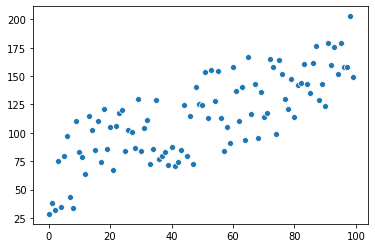

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1029.617387
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 1031.275453
[1.92774944 2.34111677]
Iteration 2 | Cost: 1032.945861
[1.92517083 1.53123831]
Iteration 3 | Cost: 1034.628693
[1.94704807 2.34357162]
Iteration 4 | Cost: 1036.324035
[1.94438357 1.52819353]
Iteration 5 | Cost: 1038.031970
[1.96634103 2.34604521]
Iteration 6 | Cost: 1039.752585
[1.96359006 1.52513013]
Iteration 7 | Cost: 1041.485963
[1.98562831 2.34853766]
Iteration 8 | Cost: 1043.232193
[1.98279032 1.52204798]
Iteration 9 | Cost: 1044.991361
[2.00490991 2.3510491 ]
Iteration 10 | Cost: 1046.763555
[2.00198433 1.51894696]
Iteration 11 | Cost: 1048.548862
[2.02418585 2.35357966]
Iteration 12 | Cost: 1050.347371
[2.0211721  1.51582694]
Iteration 13 | Cost: 1052.159172
[2.04345613 2.35612946]
Iteration 14 | Cost: 1053.984355
[2.04035363 1.51268779]
Iteration 15 | Cost: 1055.823010
[2.06272074 2.35869865]
Iteration 16 | Cost: 1057.675229
[2.05952892 1.50952937]
Iteration 17 | Cost: 1059.541102
[2.08197

[7.11002982 4.53087569]
Iteration 560 | Cost: 12487.366701
[ 7.03817025 -0.82142651]
Iteration 561 | Cost: 12567.400766
[7.12796727 4.54875449]
Iteration 562 | Cost: 12647.979328
[ 7.05555691 -0.83989941]
Iteration 563 | Cost: 12729.106084
[7.14590112 4.56675662]
Iteration 564 | Cost: 12810.784758
[ 7.07293624 -0.85849589]
Iteration 565 | Cost: 12893.019098
[7.16383137 4.58488291]
Iteration 566 | Cost: 12975.812878
[ 7.09030824 -0.87721678]
Iteration 567 | Cost: 13059.169897
[7.18175805 4.60313421]
Iteration 568 | Cost: 13143.093981
[ 7.10767288 -0.89606294]
Iteration 569 | Cost: 13227.588980
[7.19968115 4.62151135]
Iteration 570 | Cost: 13312.658772
[ 7.12503015 -0.91503521]
Iteration 571 | Cost: 13398.307261
[7.21760071 4.6400152 ]
Iteration 572 | Cost: 13484.538377
[ 7.14238005 -0.93413445]
Iteration 573 | Cost: 13571.356077
[7.23551673 4.65864662]
Iteration 574 | Cost: 13658.764344
[ 7.15972257 -0.95336153]
Iteration 575 | Cost: 13746.767190
[7.25342923 4.67740647]
Iteration 576 | 

Iteration 1105 | Cost: 472827.012071
[11.95020446 18.74521257]
Iteration 1106 | Cost: 476034.112869
[ 11.44619048 -15.22363155]
Iteration 1107 | Cost: 479262.996954
[11.9681732  18.86012983]
Iteration 1108 | Cost: 482513.812276
[ 11.46067833 -15.33942865]
Iteration 1109 | Cost: 485786.707793
[11.9861487  18.97582935]
Iteration 1110 | Cost: 489081.833472
[ 11.47514932 -15.45601052]
Iteration 1111 | Cost: 492399.340298
[12.00413106 19.09231642]
Iteration 1112 | Cost: 495739.380285
[ 11.48960338 -15.57338246]
Iteration 1113 | Cost: 499102.106475
[12.02212035 19.20959641]
Iteration 1114 | Cost: 502487.672953
[ 11.50404043 -15.69154985]
Iteration 1115 | Cost: 505896.234848
[12.04011665 19.3276747 ]
Iteration 1116 | Cost: 509327.948346
[ 11.51846038 -15.8105181 ]
Iteration 1117 | Cost: 512782.970689
[12.05812005 19.44655671]
Iteration 1118 | Cost: 516261.460192
[ 11.53286316 -15.93029263]
Iteration 1119 | Cost: 519763.576241
[12.07613063 19.56624789]
Iteration 1120 | Cost: 523289.479308
[ 11

Iteration 1668 | Cost: 21341139.164908
[  14.35275511 -112.26221435]
Iteration 1669 | Cost: 21486083.530032
[ 17.80304483 116.09575716]
Iteration 1670 | Cost: 21632012.353010
[  14.35596092 -113.0366265 ]
Iteration 1671 | Cost: 21778932.320246
[ 17.82963206 116.87234541]
Iteration 1672 | Cost: 21926850.163556
[  14.35908286 -113.81629683]
Iteration 1673 | Cost: 22075772.660482
[ 17.85629424 117.65420981]
Iteration 1674 | Cost: 22225706.634597
[  14.36212037 -114.60126107]
Iteration 1675 | Cost: 22376658.955819
[ 17.88303189 118.44138619]
Iteration 1676 | Cost: 22528636.540728
[  14.36507292 -115.39155516]
Iteration 1677 | Cost: 22681646.352878
[ 17.90984558 119.23391065]
Iteration 1678 | Cost: 22835695.403122
[  14.36793998 -116.18721531]
Iteration 1679 | Cost: 22990790.749930
[ 17.93673584 120.03181949]
Iteration 1680 | Cost: 23146939.499712
[  14.37072098 -116.98827797]
Iteration 1681 | Cost: 23304148.807146
[ 17.96370323 120.8351493 ]
Iteration 1682 | Cost: 23462425.875503
[  14.373

Iteration 2231 | Cost: 964452193.043554
[ 31.63559287 767.94406739]
Iteration 2232 | Cost: 971002716.012571
[   8.49751138 -767.21578531]
Iteration 2233 | Cost: 977597729.911826
[ 31.72769587 773.14841593]
Iteration 2234 | Cost: 984237536.922207
[   8.4324129  -772.43818966]
Iteration 2235 | Cost: 990922441.277002
[ 31.8203276  778.38811369]
Iteration 2236 | Cost: 997652749.275844
[   8.36677545 -777.69606295]
Iteration 2237 | Cost: 1004428769.298746
[ 31.91349167 783.66340076]
Iteration 2238 | Cost: 1011250811.820221
[   8.3005954  -782.98964607]
Iteration 2239 | Cost: 1018119189.423516
[ 32.00719173 788.97451885]
Iteration 2240 | Cost: 1025034216.814935
[   8.23386909 -788.31918157]
Iteration 2241 | Cost: 1031996210.838258
[ 32.10143145 794.32171134]
Iteration 2242 | Cost: 1039005490.489252
[   8.16659285 -793.68491363]
Iteration 2243 | Cost: 1046062376.930296
[ 32.19621453 799.70522323]
Iteration 2244 | Cost: 1053167193.505093
[   8.09876296 -799.08708811]
Iteration 2245 | Cost: 106

Iteration 2809 | Cost: 48244850683.343903
[ 105.56303351 5421.28157907]
Iteration 2810 | Cost: 48572528068.555664
[  -58.12766988 -5436.44308166]
Iteration 2811 | Cost: 48902431027.447578
[ 106.13047419 5458.09164174]
Iteration 2812 | Cost: 49234574676.040596
[  -58.67205519 -5473.37831573]
Iteration 2813 | Cost: 49568974233.023132
[ 106.70168035 5495.15171844]
Iteration 2814 | Cost: 49905645020.448425
[  -59.22022648 -5510.56441132]
Iteration 2815 | Cost: 50244602464.436485
[ 107.2766776  5532.46350726]
Iteration 2816 | Cost: 50585862095.881096
[  -59.77220944 -5548.00307228]
Iteration 2817 | Cost: 50929439551.161316
[ 107.85549171 5570.02871781]
Iteration 2818 | Cost: 51275350572.858124
[  -60.32802993 -5585.69601402]
Iteration 2819 | Cost: 51623611010.475174
[ 108.43814865 5607.84907134]
Iteration 2820 | Cost: 51974236821.165871
[  -60.88771399 -5623.64496361]
Iteration 2821 | Cost: 52327244070.463799
[ 109.02467453 5645.92630075]
Iteration 2822 | Cost: 52682648933.019173
[  -61.451

[  -568.43229138 -39515.7542008 ]
Iteration 3397 | Cost: 2582372369980.845215
[  625.16193774 39652.83418707]
Iteration 3398 | Cost: 2599911755474.805176
[  -572.46745198 -39784.15458547]
Iteration 3399 | Cost: 2617570267879.791504
[  629.23358821 39922.14416854]
Iteration 3400 | Cost: 2635348716301.745117
[  -576.5301001  -40054.37793522]
Iteration 3401 | Cost: 2653247915342.024414
[  633.33281235 40193.28329548]
Iteration 3402 | Cost: 2671268685134.726074
[  -580.62042244 -40326.43663157]
Iteration 3403 | Cost: 2689411851384.275391
[  637.45979745 40466.26399139]
Iteration 3404 | Cost: 2707678245403.254395
[  -584.73860691 -40600.34314014]
Iteration 3405 | Cost: 2726068704150.487793
[  641.6147321  40741.09876414]
Iteration 3406 | Cost: 2744584070269.403320
[  -588.88484273 -40876.1100112 ]
Iteration 3407 | Cost: 2763225192126.631348
[  645.79780615 41017.80020656]
Iteration 3408 | Cost: 2781992923850.873535
[  -593.05932041 -41153.74988027]
Iteration 3409 | Cost: 2800888125372.05615

Iteration 3958 | Cost: 115136693771324.765625
[  -3961.26936411 -264759.88946693]
Iteration 3959 | Cost: 115918698287937.359375
[  4035.64116    265660.50770562]
Iteration 3960 | Cost: 116706014152687.484375
[  -3988.37032394 -266558.14004591]
Iteration 3961 | Cost: 117498677440071.296875
[  4062.85490798 267464.85446353]
Iteration 3962 | Cost: 118296724469601.796875
[  -4015.6554267  -268368.60428067]
Iteration 3963 | Cost: 119100191807472.875000
[  4090.2534167 269281.4562845]
Iteration 3964 | Cost: 119909116268234.984375
[  -4043.12592306 -270191.36512596]
Iteration 3965 | Cost: 120723534916481.578125
[  4117.83794107 271110.3964045 ]
Iteration 3966 | Cost: 121543485068547.406250
[  -4070.78307217 -272026.50609993]
Iteration 3967 | Cost: 122369004294218.546875
[  4145.60974453 272951.75862485]
Iteration 3968 | Cost: 123200130418454.484375
[  -4098.62814175 -273874.111288  ]
Iteration 3969 | Cost: 124036901523119.562500
[  4173.5700991  274805.62731602]
Iteration 3970 | Cost: 1248793

Iteration 4534 | Cost: 5682046220960953.000000
[  -28008.24946974 -1859943.81702214]
Iteration 4535 | Cost: 5720638486057901.000000
[  28169.90840475 1866252.39865249]
Iteration 4536 | Cost: 5759492868509657.000000
[  -28198.69712935 -1872576.50239216]
Iteration 4537 | Cost: 5798611148608392.000000
[  28361.02085297 1878927.91152115]
Iteration 4538 | Cost: 5837995118737980.000000
[  -28390.43837079 -1885294.98853147]
Iteration 4539 | Cost: 5877646583456082.000000
[  28553.43126266 1891689.51604407]
Iteration 4540 | Cost: 5917567359576870.000000
[  -28583.48198002 -1898099.85819598]
Iteration 4541 | Cost: 5957759276254246.000000
[  28747.14844955 1904537.79695283]
Iteration 4542 | Cost: 5998224175065687.000000
[  -28777.83680265 -1910991.69809967]
Iteration 4543 | Cost: 6038963910096558.000000
[  28942.18128925 1917473.3429505 ]
Iteration 4544 | Cost: 6079980348025139.000000
[  -28973.51174439 -1923971.09894143]
Iteration 4545 | Cost: 6121275368208123.000000
[  29138.53871765 1930496.74

Iteration 5120 | Cost: 300049690750589120.000000
[  -203736.78596352 -13515880.16302899]
Iteration 5121 | Cost: 302087618067159040.000000
[  204499.56428591 13561705.0409943 ]
Iteration 5122 | Cost: 304139386916899904.000000
[  -205120.79487379 -13607679.57219858]
Iteration 5123 | Cost: 306205091311035584.000000
[  205888.28278096 13653815.67157884]
Iteration 5124 | Cost: 308284825899311104.000000
[  -206514.20398752 -13700102.47983884]
Iteration 5125 | Cost: 310378685974328960.000000
[  207286.43334298 13746551.91444123]
Iteration 5126 | Cost: 312486767475915520.000000
[  -207917.07715057 -13793153.12073025]
Iteration 5127 | Cost: 314609166995517184.000000
[  208694.08003428 13839918.01871881]
Iteration 5128 | Cost: 316745981780626752.000000
[  -209329.47864242 -13886835.75841574]
Iteration 5129 | Cost: 318897309739238016.000000
[  210111.28735226 13933918.26240895]
Iteration 5130 | Cost: 321063249444332800.000000
[  -210751.47317913 -13981154.68539607]
Iteration 5131 | Cost: 32324390

Iteration 5692 | Cost: 14412032277984329728.000000
[ -1412213.44330306 -93672129.44107662]
Iteration 5693 | Cost: 14509918312104579072.000000
[ 1417078.024658   93989702.86334135]
Iteration 5694 | Cost: 14608469184846563328.000000
[ -1421805.4016083  -94308347.37476517]
Iteration 5695 | Cost: 14707689411771574272.000000
[ 1426702.51795506 94628077.72584622]
Iteration 5696 | Cost: 14807583539110569984.000000
[ -1431462.50822548 -94948886.47906654]
Iteration 5697 | Cost: 14908156143972280320.000000
[ 1436392.38042729 95270788.40875311]
Iteration 5698 | Cost: 15009411834553004032.000000
[ -1441185.20563974 -95593776.10322513]
Iteration 5699 | Cost: 15111355250347755520.000000
[ 1446148.05605992 95917864.36080699]
Iteration 5700 | Cost: 15213991062362861568.000000
[ -1450973.9393415  -96243045.79582404]
Iteration 5701 | Cost: 15317323973329956864.000000
[ 1455969.99185374 96569335.23076786]
Iteration 5702 | Cost: 15421358717921447936.000000
[ -1460829.15784699 -96896725.30613951]
Iteration

[-1.02625345e+07 -6.80698211e+08]
Iteration 6279 | Cost: 766219832267986960384.000000
[1.02974082e+07 6.83005942e+08]
Iteration 6280 | Cost: 771423971364981178368.000000
[-1.03322375e+07 -6.85321490e+08]
Iteration 6281 | Cost: 776663456798105927680.000000
[1.03673476e+07 6.87644895e+08]
Iteration 6282 | Cost: 781938528638476091392.000000
[-1.04024140e+07 -6.89976171e+08]
Iteration 6283 | Cost: 787249428587761893376.000000
[1.04377620e+07 6.92315356e+08]
Iteration 6284 | Cost: 792596399989263564800.000000
[-1.04730671e+07 -6.94662465e+08]
Iteration 6285 | Cost: 797979687839059542016.000000
[1.05086547e+07 6.97017538e+08]
Iteration 6286 | Cost: 803399538797235011584.000000
[-1.05442001e+07 -6.99380589e+08]
Iteration 6287 | Cost: 808856201199181496320.000000
[1.05800288e+07 7.01751657e+08]
Iteration 6288 | Cost: 814349925066974560256.000000
[-1.06158162e+07 -7.04130759e+08]
Iteration 6289 | Cost: 819880962120832516096.000000
[1.06518877e+07 7.06517931e+08]
Iteration 6290 | Cost: 825449565

Iteration 6855 | Cost: 37813284017221092245504.000000
[7.23389128e+07 4.79810762e+09]
Iteration 6856 | Cost: 38070110558968621301760.000000
[-7.25840735e+07 -4.81437434e+09]
Iteration 6857 | Cost: 38328681457871600222208.000000
[7.28302360e+07 4.83069621e+09]
Iteration 6858 | Cost: 38589008561544592621568.000000
[-7.30770623e+07 -4.84707340e+09]
Iteration 6859 | Cost: 38851103798070815490048.000000
[7.33248962e+07 4.86350613e+09]
Iteration 6860 | Cost: 39114979176548631838720.000000
[-7.35733995e+07 -4.87999456e+09]
Iteration 6861 | Cost: 39380646787641717555200.000000
[7.38229161e+07 4.89653890e+09]
Iteration 6862 | Cost: 39648118804133204459520.000000
[-7.40731078e+07 -4.91313932e+09]
Iteration 6863 | Cost: 39917407481483338186752.000000
[7.43243186e+07 4.92979603e+09]
Iteration 6864 | Cost: 40188525158391011606528.000000
[-7.45762102e+07 -4.94650920e+09]
Iteration 6865 | Cost: 40461484257359081504768.000000
[7.48291265e+07 4.96327903e+09]
Iteration 6866 | Cost: 407362972852637034086

[5.29243716e+08 3.51037843e+10]
Iteration 7444 | Cost: 2037755349921529564495872.000000
[-5.31037888e+08 -3.52227944e+10]
Iteration 7445 | Cost: 2051595715101383513341952.000000
[5.32838321e+08 3.53422080e+10]
Iteration 7446 | Cost: 2065530083571828959215616.000000
[-5.34644680e+08 -3.54620264e+10]
Iteration 7447 | Cost: 2079559093800026698153984.000000
[5.36457341e+08 3.55822511e+10]
Iteration 7448 | Cost: 2093683388589580784500736.000000
[-5.38275969e+08 -3.57028833e+10]
Iteration 7449 | Cost: 2107903615109996100976640.000000
[5.40100940e+08 3.58239245e+10]
Iteration 7450 | Cost: 2122220424926335644729344.000000
[-5.41931921e+08 -3.59453761e+10]
Iteration 7451 | Cost: 2136634474029069476298752.000000
[5.43769287e+08 3.60672394e+10]
Iteration 7452 | Cost: 2151146422864126605787136.000000
[-5.45612705e+08 -3.61895158e+10]
Iteration 7453 | Cost: 2165756936363166727667712.000000
[5.47462550e+08 3.63122068e+10]
Iteration 7454 | Cost: 2180466683974048718782464.000000
[-5.49318488e+08 -3.64

[3.54587151e+09 2.35191299e+11]
Iteration 8006 | Cost: 91471683316393041849221120.000000
[-3.55789276e+09 -2.35988653e+11]
Iteration 8007 | Cost: 92092955885135777039908864.000000
[3.56995495e+09 2.36788711e+11]
Iteration 8008 | Cost: 92718448116080797567418368.000000
[-3.58205784e+09 -2.37591480e+11]
Iteration 8009 | Cost: 93348188669030676155072512.000000
[3.59420196e+09 2.38396972e+11]
Iteration 8010 | Cost: 93982206398444046638907392.000000
[-3.60638706e+09 -2.39205194e+11]
Iteration 8011 | Cost: 94620530354758556974055424.000000
[3.61861366e+09 2.40016156e+11]
Iteration 8012 | Cost: 95263189785721123685531648.000000
[-3.63088152e+09 -2.40829867e+11]
Iteration 8013 | Cost: 95910214137728322441838592.000000
[3.64319116e+09 2.41646337e+11]
Iteration 8014 | Cost: 96561633057175712160546816.000000
[-3.65554234e+09 -2.42465575e+11]
Iteration 8015 | Cost: 97217476391816436243234816.000000
[3.66793559e+09 2.43287591e+11]
Iteration 8016 | Cost: 97877774192128327845675008.000000
[-3.6803706

[2.37569292e+10 1.57575454e+12]
Iteration 8568 | Cost: 4106022270561967728907780096.000000
[-2.38374707e+10 -1.58109672e+12]
Iteration 8569 | Cost: 4133910234474505802281385984.000000
[2.39182855e+10 1.58645701e+12]
Iteration 8570 | Cost: 4161987612491481958016090112.000000
[-2.39993740e+10 -1.59183547e+12]
Iteration 8571 | Cost: 4190255691107071169465942016.000000
[2.40807377e+10 1.59723217e+12]
Iteration 8572 | Cost: 4218715765553261818362724352.000000
[-2.41623770e+10 -1.60264716e+12]
Iteration 8573 | Cost: 4247369139859222175890276352.000000
[2.42442932e+10 1.60808052e+12]
Iteration 8574 | Cost: 4276217126911034670398308352.000000
[-2.43264870e+10 -1.61353229e+12]
Iteration 8575 | Cost: 4305261048511865561720815616.000000
[2.44089596e+10 1.61900255e+12]
Iteration 8576 | Cost: 4334502235442524942122352640.000000
[-2.44917117e+10 -1.62449135e+12]
Iteration 8577 | Cost: 4363942027522438504348909568.000000
[2.45747445e+10 1.62999876e+12]
Iteration 8578 | Cost: 4393581773671038223608971

Iteration 9114 | Cost: 165394121093385991505389289472.000000
[-1.51289768e+11 -1.00347792e+13]
Iteration 9115 | Cost: 166517472350749548252583952384.000000
[1.51802676e+11 1.00687995e+13]
Iteration 9116 | Cost: 167648453371729083165057220608.000000
[-1.52317323e+11 -1.01029351e+13]
Iteration 9117 | Cost: 168787115977420319092998406144.000000
[1.52833715e+11 1.01371864e+13]
Iteration 9118 | Cost: 169933512340885528417878933504.000000
[-1.53351857e+11 -1.01715539e+13]
Iteration 9119 | Cost: 171087694989545331482679050240.000000
[1.53871756e+11 1.02060378e+13]
Iteration 9120 | Cost: 172249716807584639139694247936.000000
[-1.54393418e+11 -1.02406387e+13]
Iteration 9121 | Cost: 173419631038375518981316411392.000000
[1.54916848e+11 1.02753569e+13]
Iteration 9122 | Cost: 174597491286917759309975650304.000000
[-1.55442053e+11 -1.03101928e+13]
Iteration 9123 | Cost: 175783351522294210544359440384.000000
[1.55969038e+11 1.03451468e+13]
Iteration 9124 | Cost: 176977266080143929917908713472.000000

Iteration 9663 | Cost: 6798890716964254517806038515712.000000
[9.69992896e+11 6.43378904e+13]
Iteration 9664 | Cost: 6845068551974878360192237436928.000000
[-9.73281401e+11 -6.45560111e+13]
Iteration 9665 | Cost: 6891560025273737186050354184192.000000
[9.76581055e+11 6.47748712e+13]
Iteration 9666 | Cost: 6938367267081427481837925564416.000000
[-9.79891895e+11 -6.49944733e+13]
Iteration 9667 | Cost: 6985492422086935997692510208000.000000
[9.83213960e+11 6.52148199e+13]
Iteration 9668 | Cost: 7032937649545924053899608588288.000000
[-9.86547288e+11 -6.54359136e+13]
Iteration 9669 | Cost: 7080705123379626588709719113728.000000
[9.89891916e+11 6.56577568e+13]
Iteration 9670 | Cost: 7128797032274494300093910351872.000000
[-9.93247884e+11 -6.58803521e+13]
Iteration 9671 | Cost: 7177215579782434766249833529344.000000
[9.96615229e+11 6.61037020e+13]
Iteration 9672 | Cost: 7225962984421836066542990655488.000000
[-9.99993989e+11 -6.63278092e+13]
Iteration 9673 | Cost: 727504147977916348550058554

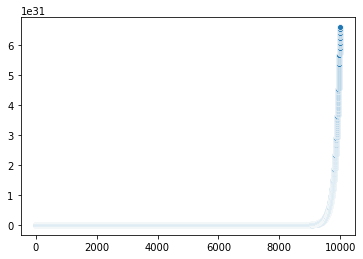

In [16]:
numEpochs= 10000
alpha = 0.00061
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise